This notebook outlines a linear regression model with disease progression for diabetes as the outcome variable and blood sugar levels as the prediction variable.  Blood sugar is known to be a key contributer to the development of diabetes so it is the chosen feature.

In [22]:
import sklearn
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import scipy as sci
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
diabetes_data = load_diabetes()

In [24]:
features = np.array(diabetes_data['data'])

In [25]:
diabetes_progression = np.array(diabetes_data['target'])
diabetes_progression_train = diabetes_progression[0:-20]
diabetes_progression_test = diabetes_progression[-20:]
blood_sugar_levels = []

for i in range(0,len(features)):
    blood_sugar_levels.append(features[i][-1])
    
blood_sugar_levels = np.array(blood_sugar_levels)
blood_sugar_levels = blood_sugar_levels.reshape(-1,1)
blood_sugar_test = blood_sugar_levels[-20:]
blood_sugar_train = blood_sugar_levels[0:-20]

In [26]:
regression_model = LinearRegression(fit_intercept = True).fit(blood_sugar_train, diabetes_progression_train)

In [27]:
blood_sugar_predict = []
for i in range(0,10):
    blood_sugar_predict.append(features[i][-1])
    
blood_sugar_predict = np.array(blood_sugar_predict)
blood_sugar_predict = blood_sugar_predict.reshape(-1,1)

In [28]:
predicted_values = regression_model.predict(blood_sugar_test)
print(predicted_values[0:10])

[147.75534215 124.24959105 168.64934313 121.63784093 207.82559497
 173.87284338 236.55484632 129.4730913  142.53184191 152.9788424 ]


In [29]:
slope = regression_model.coef_
intercept = regression_model.intercept_

print(slope)
print(intercept)

[630.53662695]
153.6583701458724


In [30]:
print("R Squared: ", regression_model.score(blood_sugar_levels, diabetes_progression))
print("RSME: ", mean_squared_error(predicted_values, diabetes_progression_test, squared = False))

R Squared:  0.14585265016093973
RSME:  72.5637599326825


In [31]:
def linearModelFunction(x, slope, intercept):
    return (slope * x + intercept)

Text(0, 0.5, 'Disease Progression')

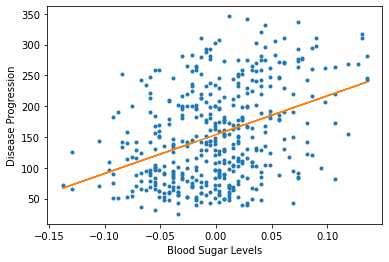

In [32]:
plt.figure(1)
plt.plot(blood_sugar_levels, diabetes_progression.reshape(-1,1), '.')
plt.plot(blood_sugar_levels, linearModelFunction(blood_sugar_levels,slope,intercept))
plt.xlabel("Blood Sugar Levels")
plt.ylabel("Disease Progression")